In [1]:
import lecilab_behavior_analysis.utils as utils
import lecilab_behavior_analysis.df_transforms as dft
import lecilab_behavior_analysis.plots as plots
from pathlib import Path
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
tv_projects = utils.get_server_projects()
animals = utils.get_animals_in_project(tv_projects[1])
animals_to_remove = ['test', 'test2']
animals = [animal for animal in animals if animal not in animals_to_remove]
# retrieve the data for the remaining animals
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    # create the directory if it doesn't exist
    local_path.mkdir(parents=True, exist_ok=True)
    # download the session data
    utils.rsync_session_data(
        project_name=tv_projects[1],
        animal=mouse,
        local_path=str(local_path),
        credentials=utils.get_idibaps_cluster_credentials(),
    )

df_list = []
for mouse in animals:
    local_path = Path(utils.get_outpath()) / Path(tv_projects[1]) / Path("sessions") / Path(mouse)
    df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")
    df_list.append(df)
    print(f"Loaded data for {mouse}.")
# concatenate the dataframes
df = pd.concat(df_list, ignore_index=True)

receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 269,151,748  speedup is 2,691,517.48
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 216,133,348  speedup is 2,161,333.48
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 231,828,280  speedup is 2,318,282.80
receiving incremental file list
ACV004.csv

sent 93,728 bytes  received 141,643 bytes  27,690.71 bytes/sec
total size is 179,725,284  speedup is 763.58
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 166,623,312  speedup is 1,666,233.12
receiving incremental file list

sent 27 bytes  received 73 bytes  66.67 bytes/sec
total size is 177,972,557  speedup is 1,779,725.57
receiving incremental file list

sent 27 bytes  received 73 bytes  40.00 bytes/sec
total size is 182,557,417  speedup is 1,825,574.17
receiving incremental file list

sent 27 byt

/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV001.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV002.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV003.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV004.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV005.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV006.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV007.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV008.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV009.


/tmp/ipykernel_89776/3884949693.py:21: DtypeWarning: Columns (13,14,17,18,27,28,29,30,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(local_path / Path(f'{mouse}.csv'), sep=";")


Loaded data for ACV010.


In [3]:
# select only the visual hard sessions
df = df[df.current_training_stage == 'TwoAFC_visual_hard']

/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df = add_auditory_real_statistics(df)
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raise ValueError("modality must be either 'visual' or 'auditory'")
/home/hmv/Github/lecilab-behavior-analysis/lecilab_behavior_analysis/df_transforms.py:198: SettingWithCopyWarning: 
A value is trying

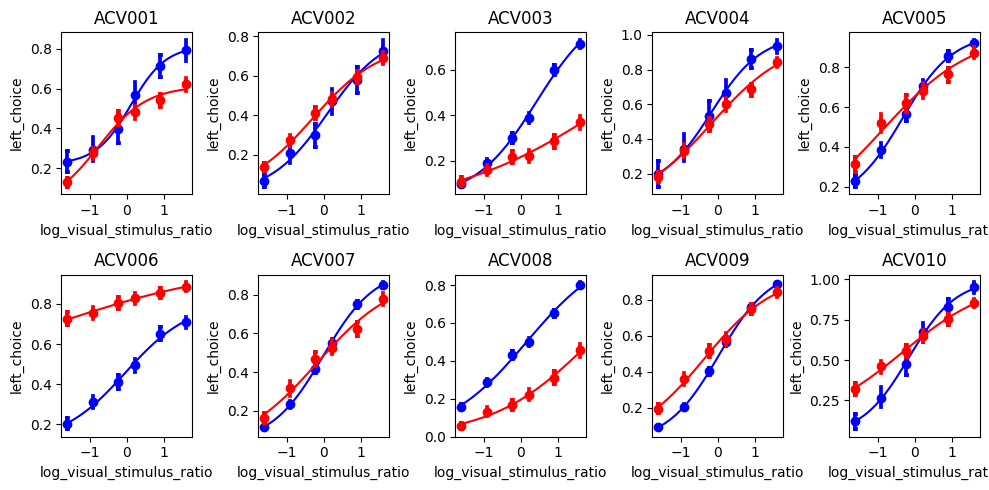

In [9]:
# date of turning on the leds
led_on_date = pd.to_datetime('2025-05-28 12:10:00')

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

bef_df = df[df.date < led_on_date]
aft_df = df[df.date >= led_on_date]

# make a figure for each subject
nrows = 2
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5))
for mouse, ax in zip(animals, axs.ravel()):
    # plot before the switch
    mouse_df = bef_df[bef_df.subject == mouse]
    psych_df = dft.get_performance_by_difficulty_ratio(mouse_df)
    ax = plots.psychometric_plot(psych_df, x = 'visual_stimulus_ratio', y = 'left_choice', ax=ax,
                                 point_kwargs={'color': 'blue'}, line_kwargs={'color': 'blue'})
    # plot after the switch
    mouse_df = aft_df[aft_df.subject == mouse]
    psych_df = dft.get_performance_by_difficulty_ratio(mouse_df)
    ax = plots.psychometric_plot(psych_df, x = 'visual_stimulus_ratio', y = 'left_choice', ax=ax,
                                 point_kwargs={'color': 'red'}, line_kwargs={'color': 'red'})
    ax.set_title(mouse)

    # remove legend
    ax.legend_.remove()

plt.tight_layout()
plt.show()